In [41]:
import sys
import importlib
import os

parent_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)

import utils
importlib.reload(utils)
from utils import *



In [60]:
toulouse = {
    "agen": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Agen/Simulation_Outputs",
    "albi": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Albi/Simulation_Outputs",
    "auch": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Auch/Simulation_Outputs",
    "toulouse": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Toulouse/Simulation_Outputs"
}
zurich= {    
    "Birmensdorf":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Birmensdorf/Simulation_Outputs",
    "Taenikon":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Taenikon/Simulation_Outputs",
    "Zurich_fluntern":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Simulation_Outputs",
    "Zurich_kloten":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Simulation_Outputs"
}
seville = {
    "Cordoba": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Cordoba/Simulation_Outputs",
    "Granada": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Granada/Simulation_Outputs",
    "Malaga": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Malaga/Simulation_Outputs",
    "Sevilla": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Sevilla/Simulation_Outputs"   
}


In [61]:
def extract_and_concat(city, column_index, prefix):
    extracted_data = []
    for city, path in city.items():
        data = extract_columns(path, column_index)
        globals()[f"{prefix}{city}"] = data
        extracted_data.append(data)
    combined_df = pd.concat(extracted_data, axis=0).reset_index(drop=True)
    globals()[f"df_combined_{city}"] = combined_df
    return combined_df

In [62]:
consommation_chauffage_toulouse = extract_and_concat(toulouse, column_index=4, prefix="consommation_heat_")
consommation_chauffage_zurich = extract_and_concat(zurich, column_index=4, prefix="consommation_heat_")
consommation_chauffage_seville = extract_and_concat(seville, column_index=4, prefix="consommation_heat_")
consommation_climatisation_toulouse = extract_and_concat(toulouse, column_index=5, prefix="consommation_cool_")
consommation_climatisation_zurich = extract_and_concat(zurich, column_index=5, prefix="consommation_cool_")
consommation_climatisation_seville = extract_and_concat(seville, column_index=5, prefix="consommation_cool_")


In [43]:
def clustering(city, column_index, prefix, heat_column="heat_on", n_clusters=3):
    # Extraction des données pour chaque ville
    extracted_data = []
    for city_name, path in city.items():
        data = extract_columns(path, column_index)
        globals()[f"{prefix}{city_name}"] = data
        extracted_data.append(data)

    # Concaténation des données extraites pour chaque ville
    combined_df = pd.concat(extracted_data, axis=0).reset_index(drop=True)
    
    # Création du dataframe final avec le nom de la ville
    globals()[f"df_combined_{city}"] = combined_df
    
    # Ajout de la colonne binaire pour status(on\off)
    df_final = add_binary_column(combined_df, column_name=heat_column)
    
    # Filtrage et préparation des données pour KMeans (si status == 1)
    df_heat = df_final[df_final[heat_column] == 1].drop(columns=[heat_column])
    
    # Application de KMeans
    model = apply_kmeans(n_clusters=n_clusters, data=df_heat)
    df_final.loc[df_final[heat_column] == 1, "clusters"] = model.labels_
    
    # Si heat_on == 0, assigner un cluster spécifique (ici, le cluster 3)
    df_final.loc[df_final[heat_column] == 0, "clusters"] = 3
    
    return df_final

In [67]:
clustering_heat_toulouse=clustering(city=toulouse, column_index=4, prefix="consommation_heat_", heat_column="heat_on", n_clusters=3)

In [45]:
toulouse_meteo = {
    "agen": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Agen/Meteo_input",
    "albi": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Albi/Meteo_input",
    "auch": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Auch/Meteo_input",
    "toulouse": "../data/simulation_data/Meteo_Perif_Toulouse_Contemporain/Toulouse/Meteo_input"
}
zurich_meteo = {
    "Birmensdorf":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Birmensdorf/Meteo_input",
    "Taenikon":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Taenikon/Meteo_input",
    "Zurich_fluntern":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Zuerich_Fluntern/Meteo_input",
    "Zurich_kloten":"../data/simulation_data/Meteo_Perif_Zurich_Contemporain/Zuerich_kloten/Meteo_input",
}
seville_meteo = {
    "Cordoba": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Cordoba/Meteo_input",
    "Granada": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Granada/Meteo_input",
    "Malaga": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Malaga/Meteo_input",
    "Sevilla": "../data/simulation_data/Meteo_Perif_Seville_Contemporain/Sevilla/Meteo_input"  
}


In [71]:
def extract_and_store_data(files, prefix, column_index):
    """
    Pour chaque fichier dans `files`, extrait toutes les colonnes
    et les stocke dans des variables globales nommées comme <NomColonne>_<ville>
    Exemple : Text_toulouse, Hum_agen, wind_zurich_kloten
    """
    for city, path in files.items():
        data = extract_columns(path, column_index)
        globals()[f"{prefix}{city}"] = data


In [72]:
def extract_and_combine_all(city_groups, prefix_column_map):
    """
     Combine toutes les colonnes extraites (ayant le même préfixe) pour le groupe de villes actuel
     Par exemple, combine Text_agen, Text_albi, etc., en un seul DataFrame : Text_combined_toulouse

    """
    for group_name, files in city_groups.items():
        for prefix, col_index in prefix_column_map.items():
            extract_and_store_data(files, prefix, col_index)

            dfs = []
            for city in files.keys():
                var_name = f"{prefix}{city}"
                if var_name in globals():
                    dfs.append(globals()[var_name])
            if dfs:
                combined_name = f"{prefix}combined_{group_name}"
                globals()[combined_name] = pd.concat(dfs, axis=0).reset_index(drop=True)


In [89]:
city_groups = {
    "toulouse": toulouse_meteo,
    "zurich": zurich_meteo,
    "seville": seville_meteo
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

extract_and_combine_all(city_groups, prefix_column_map)


In [90]:
def add_profil_and_status(input_df, conso_df, status_col="heat_on", profil_col="clusters"):
    df = input_df.copy()
    df[status_col] = conso_df[status_col]
    df[profil_col] = conso_df[profil_col]
    df.columns = df.columns.astype(str)
    return df

In [91]:
def add_profil_and_status(input_df, conso_df, status_col="heat_on", profil_col="clusters"):
    """
    Ajoute les colonnes 'status_col' et 'profil_col' provenant de 'conso_df' à 'input_df'.
    """
    df = input_df.copy()
    df[status_col] = conso_df[status_col]
    df[profil_col] = conso_df[profil_col]
    df.columns = df.columns.astype(str)  
    return df


In [92]:
Text_conso_heat_tou = add_profil_and_status(input_df=Text_combined_toulouse, conso_df=df_final,status_col="heat_on")

In [93]:
def evaluate_models_split_manual(df, target_col, models, split_ratio=8):
    """
    -Évalue plusieurs modèles avec séparation manuelle ( 80% pour le train) 
    -un df avec les resutlat reel et predit de la partie test  pour chaque modèle une colonne y_pred_<nom_du_modèle>.
    
    """
  
    # Séparer X et y
    X = df.drop(columns=[target_col])
    y = df[target_col].values

    split_index = int((X.shape[0] * split_ratio) / 10)
    X_train, X_test = X.iloc[:split_index, :], X.iloc[split_index:, :]
    y_train, y_test = y[:split_index], y[split_index:]

    results = {}
    df_test_results = X_test.copy()
    df_test_results["y_true"] = y_test

    for name, model in models.items():
        print(f"\nÉvaluation de {name}...")
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        execution_time = time.time() - start_time

        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            "f1_score": f1,
            "accuracy": accuracy,
            "execution_time (s)": execution_time
        }

        df_test_results[f'y_pred_{name}'] = y_pred

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()

        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f} - Temps: {execution_time:.2f} sec")
        print("###################################################################")

    return results, df_test_results



Évaluation de Random Forest...


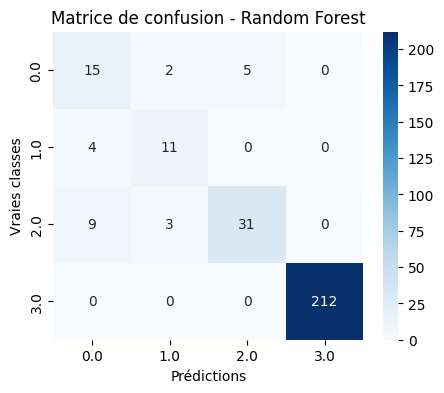

Random Forest - Accuracy: 0.9212 - F1 Score: 0.9233 - Temps: 0.47 sec
###################################################################

Évaluation de Logistic Regression...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


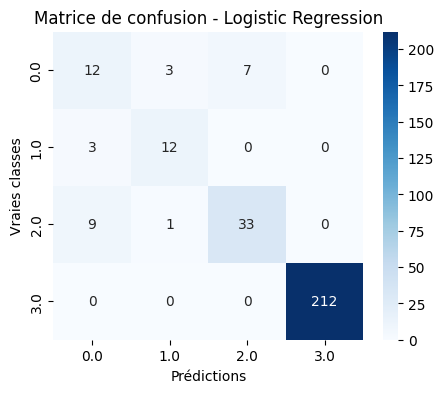

Logistic Regression - Accuracy: 0.9212 - F1 Score: 0.9222 - Temps: 0.54 sec
###################################################################

Évaluation de SVC...


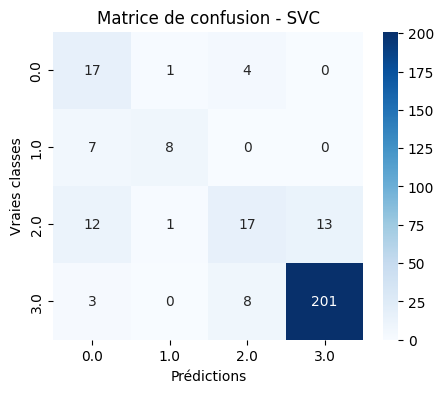

SVC - Accuracy: 0.8322 - F1 Score: 0.8295 - Temps: 0.07 sec
###################################################################

Évaluation de KNN...


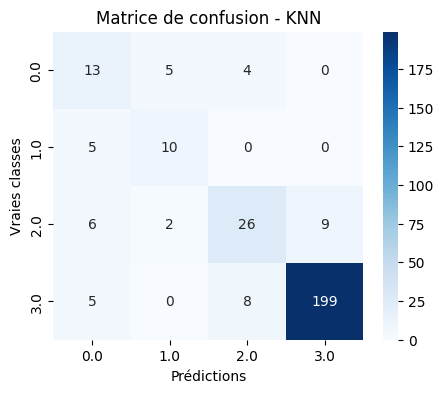

KNN - Accuracy: 0.8493 - F1 Score: 0.8531 - Temps: 0.04 sec
###################################################################

Évaluation de Gradient Boosting...


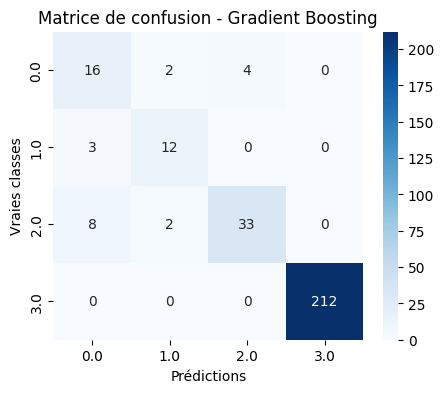

Gradient Boosting - Accuracy: 0.9349 - F1 Score: 0.9365 - Temps: 4.13 sec
###################################################################


In [117]:

Text_conso_heat_tou = add_profil_and_status(input_df=Text_combined_toulouse, conso_df=df_final,status_col="heat_on")
re,Test_Text_heat_toulouse=evaluate_models_split_manual(df=Text_conso_heat_tou, target_col="clusters", models=models, split_ratio=8)

In [101]:
def concat_and_create_final_df(city, prefixes):
    """
    Concatène les DataFrames spécifiés par des préfixes pour une ville donnée afin de former 
    une entrée multivariée  pour un modèle de prédiction.
    Le nom du DataFrame final est généré  selon la structure :
    "{prefix1}_{prefix2}_..._combined_{city}"
    Par exemple : Text_Solar_Ground_combined_toulouse
    """
    dfs = []
    for prefix in prefixes:
        var_name = f"{prefix}_combined_{city}"  
        if var_name in globals():
            dfs.append(globals()[var_name]) 

    final_df_name = f"{'_'.join(prefixes)}_combined_{city}" 
    final_df = pd.concat(dfs, axis=1).reset_index(drop=True)  
    globals()[final_df_name] = final_df  
    return final_df
    

In [102]:
final_df=concat_and_create_final_df("toulouse",  ['Text', 'Solar'])


Évaluation de Random Forest...


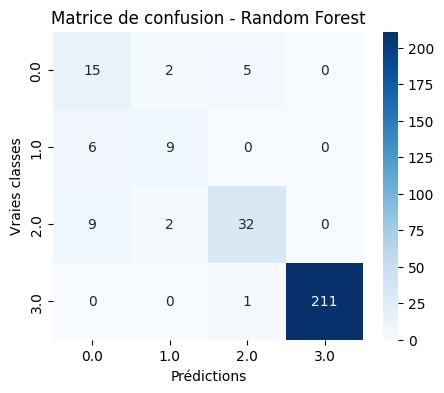

Random Forest - Accuracy: 0.9144 - F1 Score: 0.9172 - Temps: 0.54 sec
###################################################################

Évaluation de Logistic Regression...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


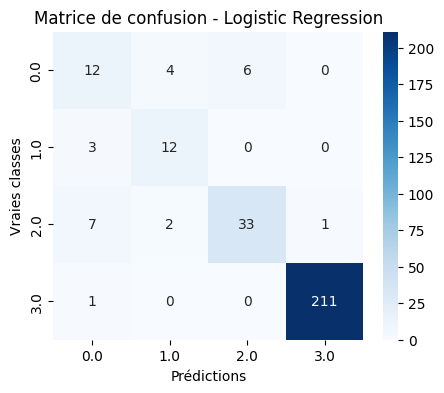

Logistic Regression - Accuracy: 0.9178 - F1 Score: 0.9187 - Temps: 0.73 sec
###################################################################

Évaluation de SVC...


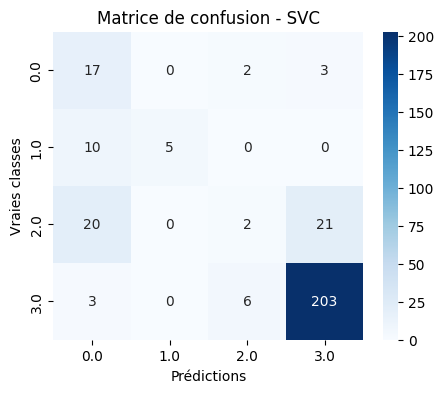

SVC - Accuracy: 0.7774 - F1 Score: 0.7438 - Temps: 0.11 sec
###################################################################

Évaluation de KNN...


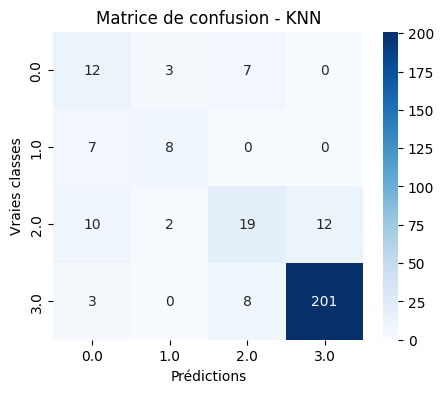

KNN - Accuracy: 0.8219 - F1 Score: 0.8223 - Temps: 0.03 sec
###################################################################

Évaluation de Gradient Boosting...


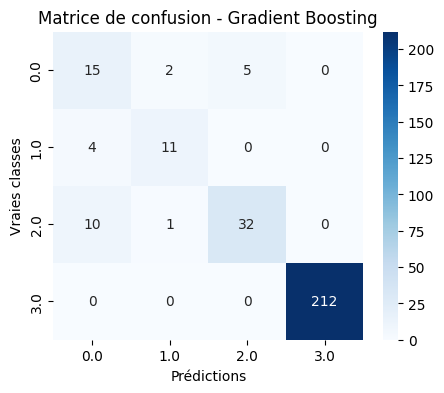

Gradient Boosting - Accuracy: 0.9247 - F1 Score: 0.9271 - Temps: 6.56 sec
###################################################################


In [106]:
Text_Solar_conso_heat_tou = add_profil_and_status(input_df=Text_Solar_combined_toulouse, conso_df=df_final,status_col="heat_on")
re,Test_Text_Solar_heat_toulouse=evaluate_models_split_manual(df=Text_Solar_conso_heat_tou, target_col="clusters", models=models, split_ratio=8)

In [116]:

def plot_f1_accuracy_results(results_dict, df_name):
    """
    Affiche un histogramme comparant le F1-score et l'Accuracy pour chaque modèle à partir des résultats.
    """

    if "_conso_heat_" in df_name:
        parts = df_name.split("_conso_heat_")
        prefixes = parts[0].replace("_", ", ")
        city = parts[1].capitalize()
        title = f"Input: {prefixes} à {city}"
    else:
        title = "Comparaison des modèles"

    df = pd.DataFrame(results_dict).T[['f1_score', 'accuracy']]

    x = np.arange(len(df))  
    width = 0.1
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, df['f1_score'], width, label='F1 Score', color='skyblue')
    ax.bar(x + width/2, df['accuracy'], width, label='Accuracy', color='lightgreen')

    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df.index, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


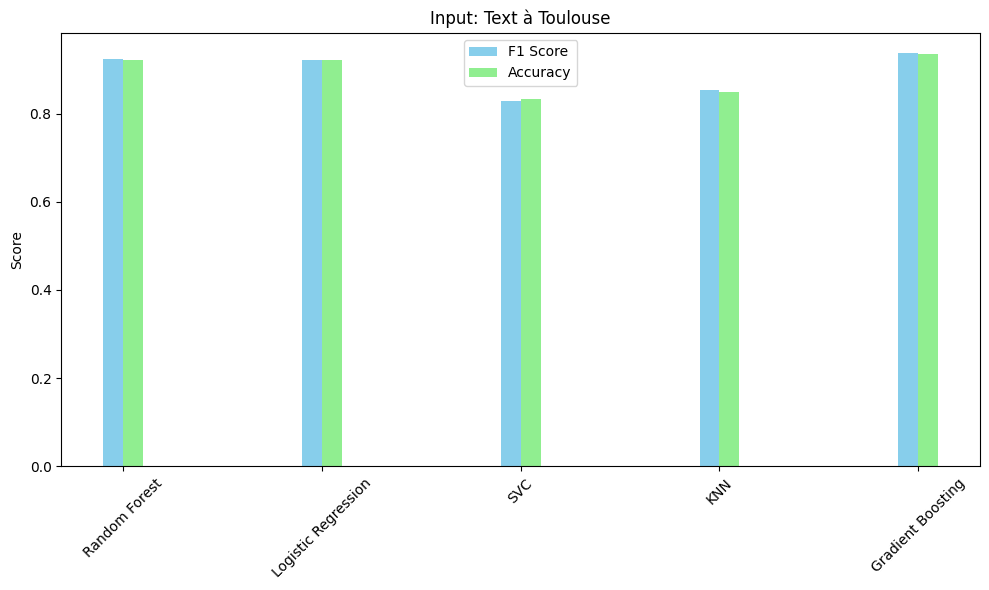

In [120]:
plot_f1_accuracy_results(re, df_name="Text_conso_heat_toulouse")